In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [7]:
data = pd.read_csv("poisson_dataset.csv")

In [9]:
data.head(5)

,Event_Type,Average_Rate,Observed_Count
0,Event_1,4.370861,1
1,Event_2,9.556429,3
2,Event_3,7.587945,2
3,Event_4,6.387926,6
4,Event_5,2.404168,11


In [23]:
data["Observed_Count"].unique()

array([ 1,  3,  2,  6, 11,  8,  0,  4, 19,  5, 10,  9,  7, 14, 13, 15, 12],
      dtype=int64)

In [13]:
data.head(2)

,Event_Type,Average_Rate,Observed_Count
0,Event_1,4.370861,1
1,Event_2,9.556429,3


In [39]:
freq = (data["Observed_Count"] == 2).sum()
freq

12

In [15]:
data["P(Observed_Count)"]= data.apply(lambda row: poisson.pmf(row["Observed_Count"], mu = row["Average_Rate"]), axis=1)

In [17]:
data.head(5)

,Event_Type,Average_Rate,Observed_Count,P(Observed_Count)
0,Event_1,4.370861,1,0.055249
1,Event_2,9.556429,3,0.010290
2,Event_3,7.587945,2,0.014582
3,Event_4,6.387926,6,0.158703
4,Event_5,2.404168,11,0.000035


Text(0, 0.5, 'P(Observed Count)')

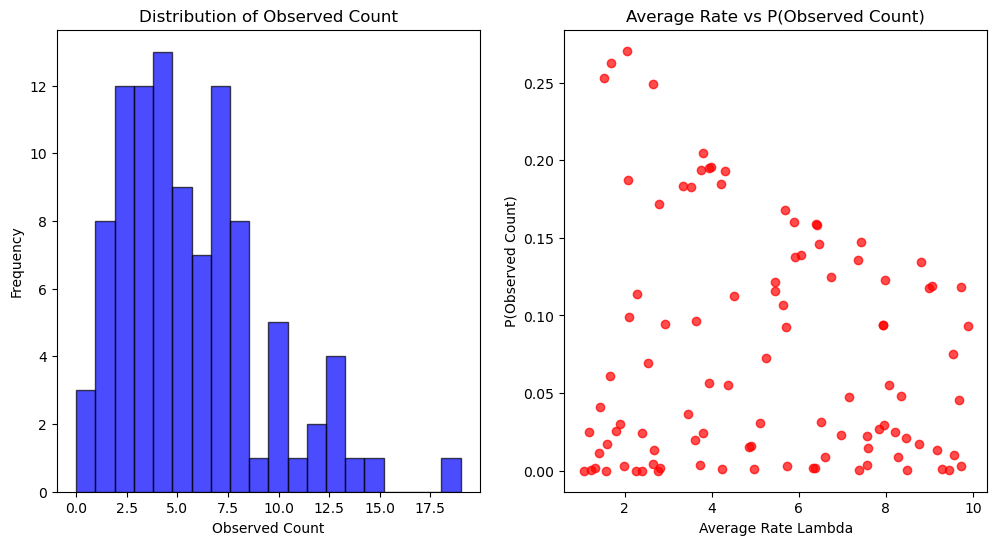

In [47]:
plt.figure(figsize=(12,6))

#Histogram
plt.subplot(1,2,1)
plt.hist(data["Observed_Count"], bins=20, color = "blue", alpha=0.7, edgecolor="black")
plt.title("Distribution of Observed Count")
plt.xlabel("Observed Count")
plt.ylabel("Frequency")

#Scatter
plt.subplot(1,2,2)
plt.scatter(data["Average_Rate"], data["P(Observed_Count)"], color="red", alpha=0.7)
plt.title("Average Rate vs P(Observed Count)")
plt.xlabel("Average Rate Lambda")
plt.ylabel("P(Observed Count)")
